# Government Demand Shock

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

# Setup

In [2]:
model = BabyMAKROModelClass(name='Extended')

In [3]:
par = model.par
ss = model.ss
sol = model.sol

# Find steady state and Jacobian


In [4]:
model.find_ss(do_print=True)

Labor supply and search and matching:
ss.S = 4.24,  ss.L = 57.88,  ss.delta_L = 0.04,  ss.v = 9.41,  ss.m_v = 0.23
Capital agency FOC:
ss.r_K = 0.14
Production firm pricing:
ss.r_ell = 2.71
Labor agency:
ss.ell = 57.41,  ss.W = 2.67
Government:
ss.B_G = 100.00,  ss.G = 61.82,  ss.tau = 0.42
Households:
solving for household behavior: result.converged = True
ss.C = 93.66,  ss.B = 111.48
Production firm FOCs:
ss.K = 572.83
Capital accumulation equation:
ss.I = 57.28
Output in production firm:
ss.Y = 235.90
Market clearing:
ss.C_Y = 65.56,  ss.G_Y = 55.64,  ss.I_Y = 37.23,  ss.X_Y = 77.47
[ ss.C_M = 28.10,  ss.G_M = 6.18,  ss.I_M = 20.05,  ss.X_M = 51.65 ] = ss.M = 105.98
ss.X = 129.11
Bargaining:
par.phi = 0.977


In [5]:
model.calc_jac(do_print=True)

Jacobian calculated in 36.8 secs secs


# Find IRF

**Set Exogenous variables to steady state:**

In [6]:
model.set_exo_ss()

**Introduce shock:**

In [7]:
Gshock = 50
shock = 0.01*ss.G
persistence = 0.80**np.arange(Gshock)
sol.G[:Gshock] = ss.G + shock*persistence

In [8]:
model.find_IRF()

initial:
   max. abs. error = 7.58e-01
    0.00e+00 in bargaining_cond
    7.58e-01 in Bq_match
    4.44e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    5.56e-01 in mkt_clearing

it = 0
 solve: t1-t0 = 0.2 secs
   max. abs. error = 7.58e-01
    5.33e-06 in bargaining_cond
    2.33e-03 in Bq_match
    7.55e-06 in FOC_capital_agency
    1.49e-04 in FOC_K_ell
    2.27e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.33e-03
    1.26e-07 in bargaining_cond
    3.52e-05 in Bq_match
    1.07e-07 in FOC_capital_agency
    4.00e-06 in FOC_K_ell
    5.28e-05 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 5.28e-05
    2.70e-09 in bargaining_cond
    4.54e-07 in Bq_match
    2.62e-09 in FOC_capital_agency
    8.62e-08 in FOC_K_ell
    1.17e-06 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

# Impulse Response Figures

## Longview - To Check Convergence

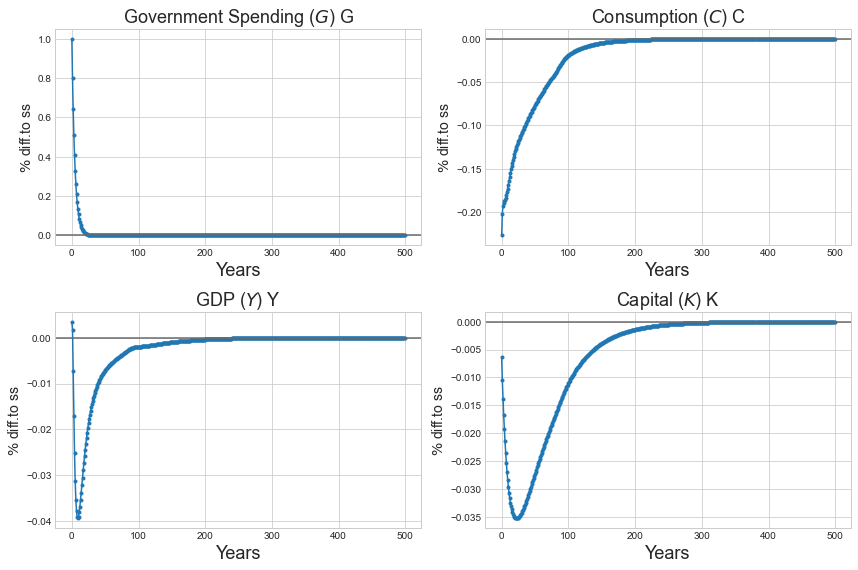

In [9]:
model.plot_IRF(varlist=['G','C','Y','K'],T_IRF=par.T,ncol=2)

## National Accouting - Quantities

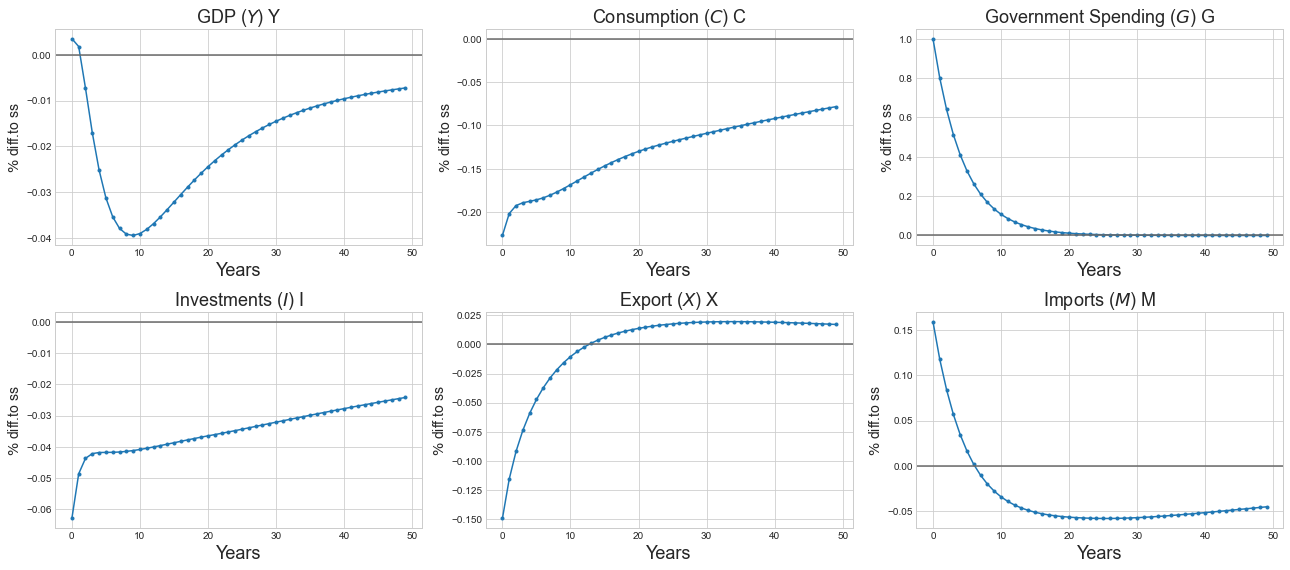

In [10]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])

## National Accouting - Prices

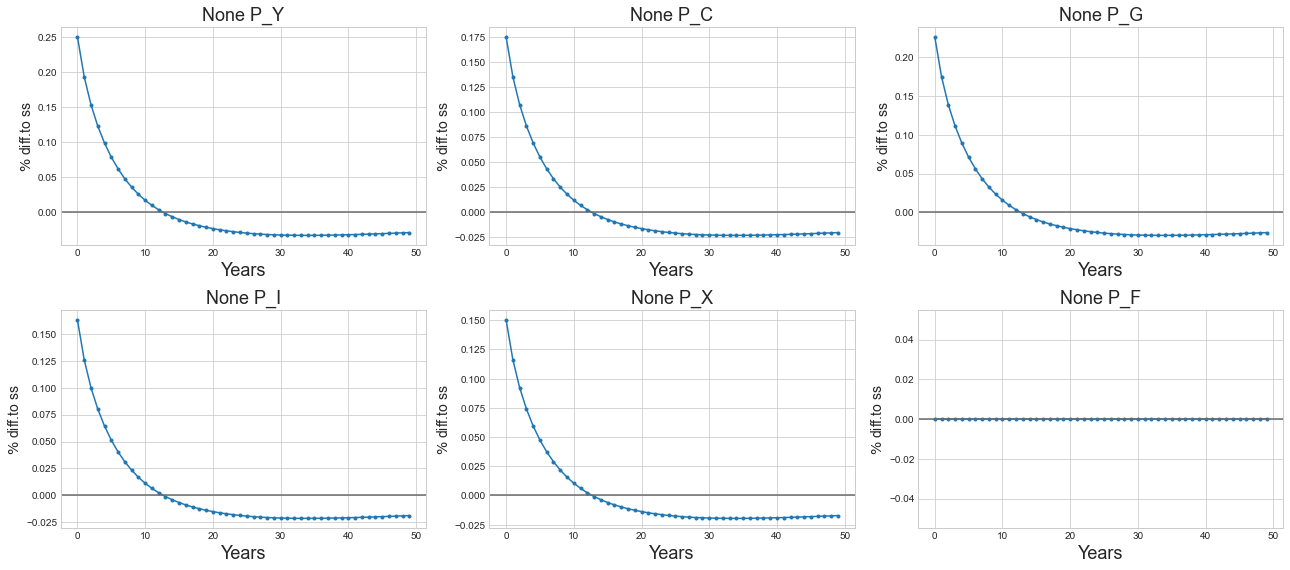

In [11]:
model.plot_IRF(varlist=['P_Y','P_C','P_G','P_I','P_X','P_F'])

## Labor Market

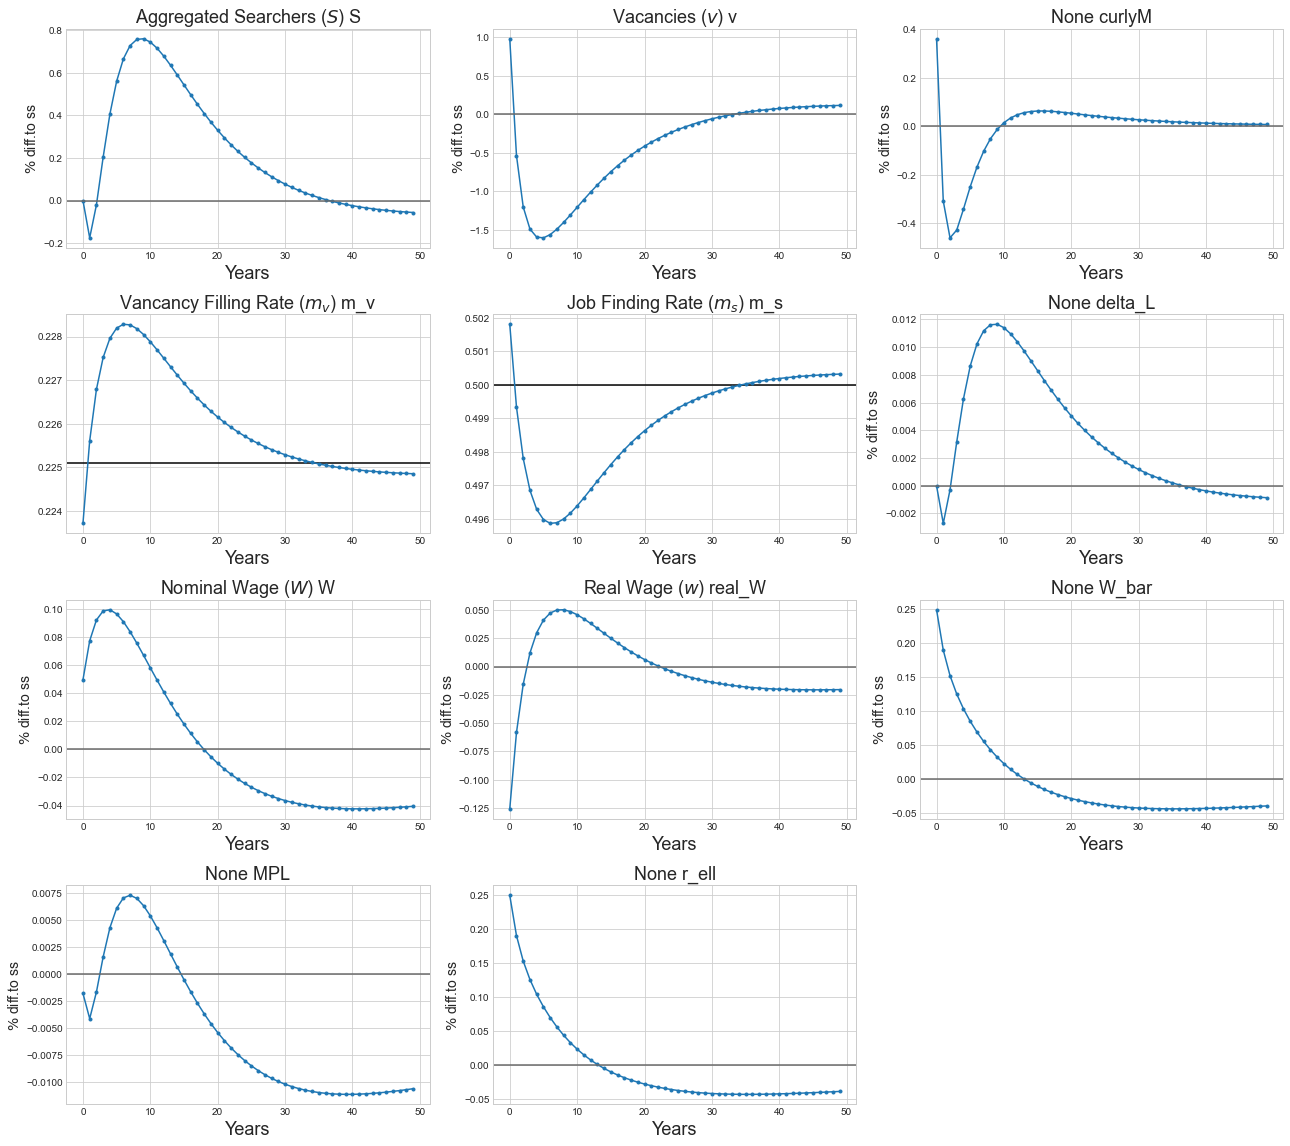

In [12]:
model.plot_IRF(varlist=['S','v','curlyM','m_v','m_s','delta_L','W','real_W','W_bar','MPL','r_ell'],abs=['m_v','m_s'])

## Capital Accumulation

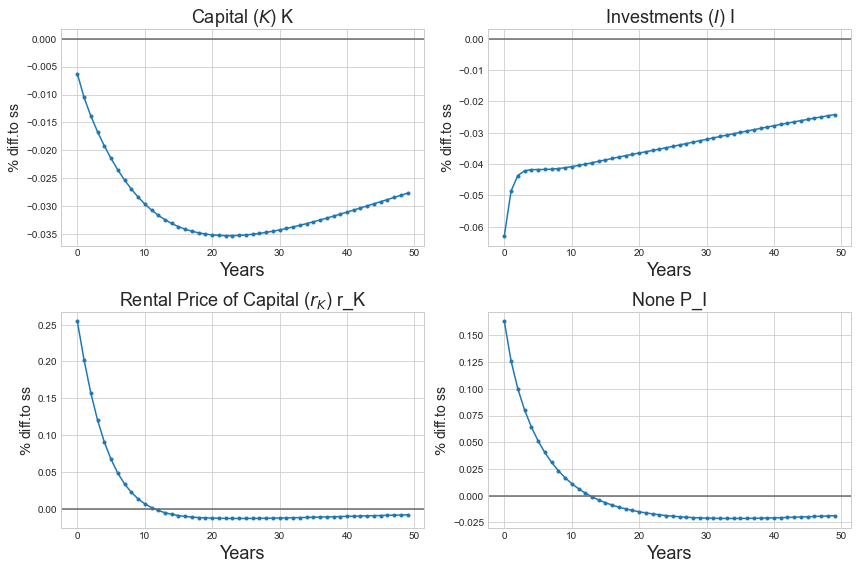

In [13]:
model.plot_IRF(varlist=['K','I','r_K','P_I'],ncol=2)

## Production Firms

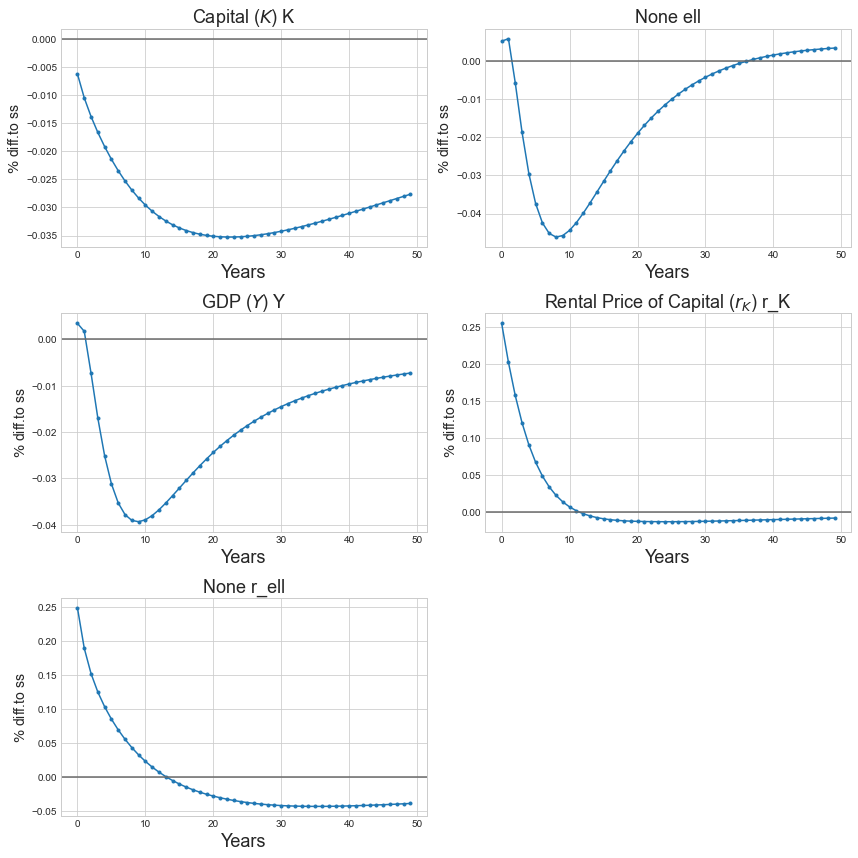

In [14]:
model.plot_IRF(varlist=['K','ell','Y','r_K','r_ell'],ncol=2)

## Government

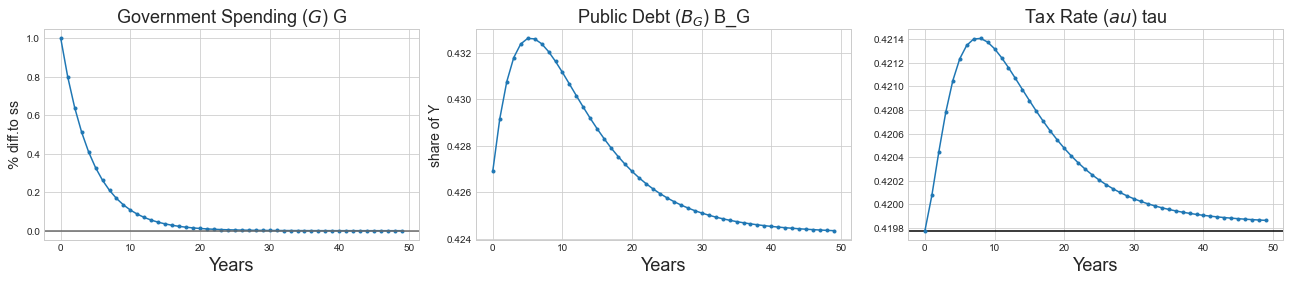

In [15]:
model.plot_IRF(varlist=['G','B_G','tau'],abs=['tau'],Y_share=['B_G'])

## Households - Aggregate

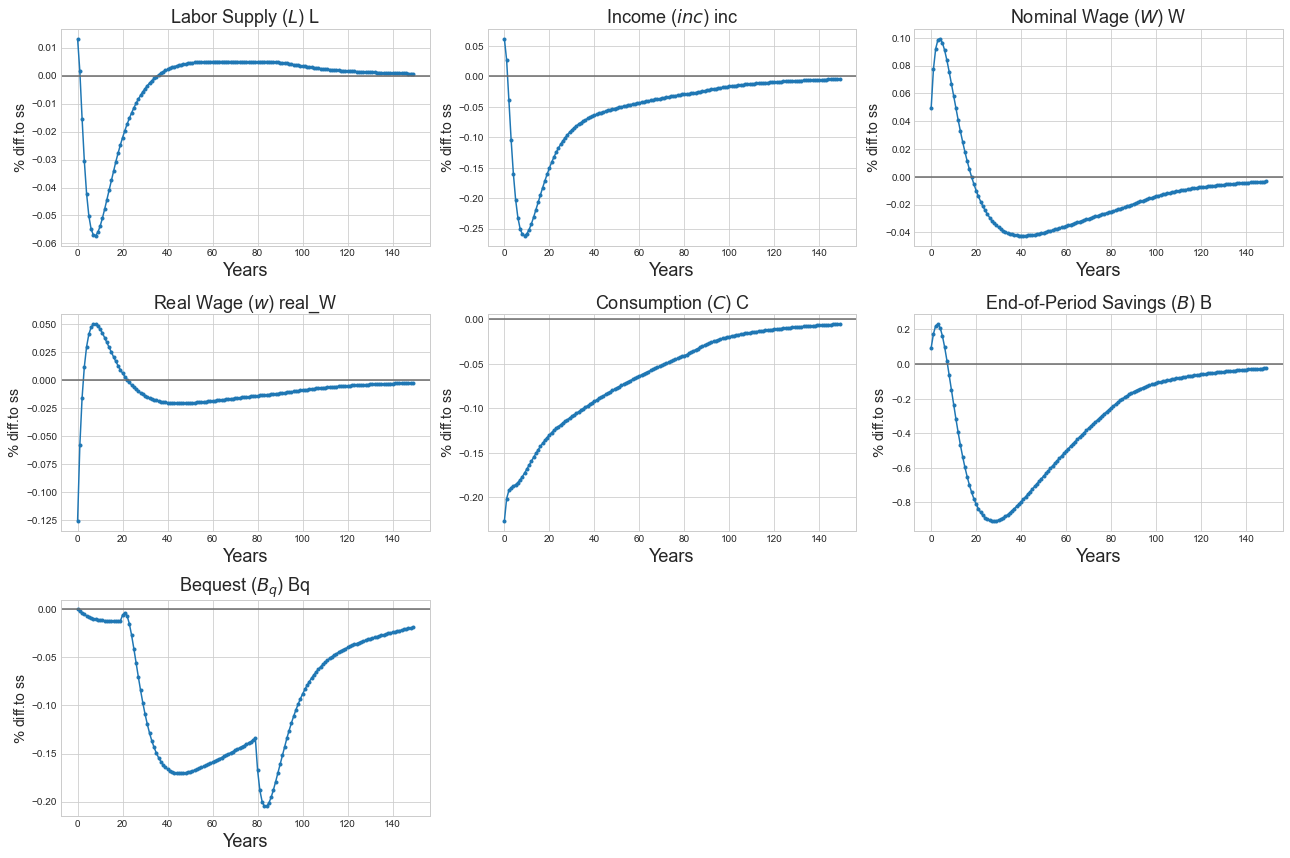

In [16]:
model.plot_IRF(varlist=['L','inc','W','real_W','C','B','Bq'],ncol=3, T_IRF = 150)

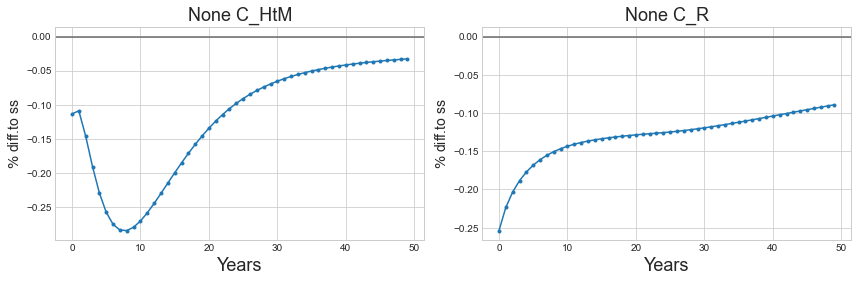

In [17]:
model.plot_IRF(varlist=['C_HtM','C_R'],ncol=2)

## Households - Life-cycle

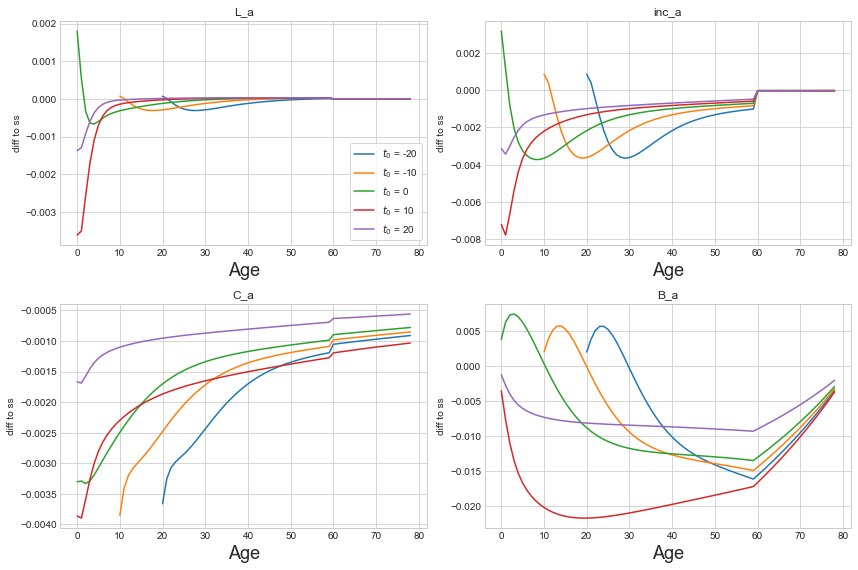

In [18]:
model.plot_IRF_hh(varlist=['L_a','inc_a','C_a','B_a'],t0_list=[-20,-10,0,10,20])

# Sensitivity Analysis

## Change in HtM-share

In [19]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()
model3 = model.copy()

In [20]:
Models = [model, model1, model2, model3] #Create list of the models
Lambdas = [0.0, 0.1, 0.2, 0.3] #Create list of Lambda values
    
for i in range(len(Models)):
    Models[i].par.Lambda = Lambdas[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Gshock = 50
    shock_G = 0.01*Models[i].ss.G
    persistence_G = 0.80**np.arange(Gshock)
    Models[i].sol.G[:Gshock] = Models[i].ss.G + shock_G*persistence_G
    Models[i].find_IRF()

initial:
   max. abs. error = 9.48e-01
    0.00e+00 in bargaining_cond
    9.48e-01 in Bq_match
    4.44e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    5.56e-01 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 9.48e-01
    5.39e-06 in bargaining_cond
    2.73e-03 in Bq_match
    6.96e-06 in FOC_capital_agency
    1.29e-04 in FOC_K_ell
    1.97e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.2 secs
   max. abs. error = 2.73e-03
    1.00e-07 in bargaining_cond
    3.70e-05 in Bq_match
    7.86e-08 in FOC_capital_agency
    3.12e-06 in FOC_K_ell
    4.06e-05 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 4.06e-05
    2.18e-09 in bargaining_cond
    4.59e-07 in Bq_match
    2.00e-09 in FOC_capital_agency
    6.97e-08 in FOC_K_ell
    9.51e-07 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

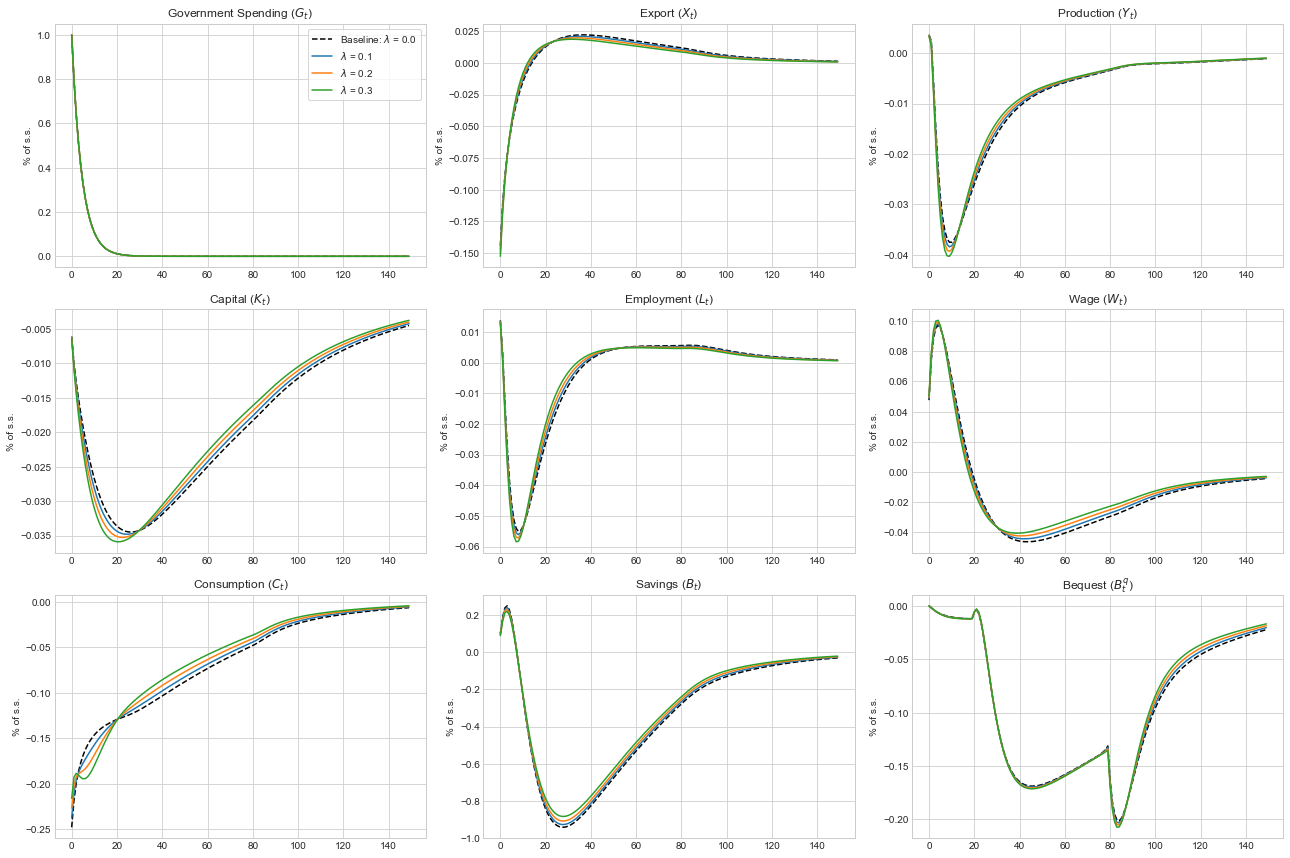

In [21]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'Baseline: $\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.G[:T_IRF]/Models[2].ss.G-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.G[:T_IRF]/Models[3].ss.G-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'Baseline: $\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.X[:T_IRF]/Models[3].ss.X-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Export ($X_t$)')

ax = fig.add_subplot(3,3,3)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$Baseline:\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.Y[:T_IRF]/Models[3].ss.Y-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Production ($Y_t$)')

ax = fig.add_subplot(3,3,4)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Capital ($K_t$)')

ax = fig.add_subplot(3,3,5)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.L[:T_IRF]/Models[3].ss.L-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Employment ($L_{t}$)')

ax = fig.add_subplot(3,3,6)
ax.plot((Models[0].sol.W[:T_IRF]/Models[0].ss.W-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.W[:T_IRF]/Models[1].ss.W-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.W[:T_IRF]/Models[2].ss.W-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.W[:T_IRF]/Models[3].ss.W-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Wage ($W_{t}$)')

ax = fig.add_subplot(3,3,7)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.C[:T_IRF]/Models[3].ss.C-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Consumption ($C_{t}$)')

ax = fig.add_subplot(3,3,8)
ax.plot((Models[0].sol.B[:T_IRF]/Models[0].ss.B-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.B[:T_IRF]/Models[1].ss.B-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.B[:T_IRF]/Models[2].ss.B-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.B[:T_IRF]/Models[3].ss.B-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Savings ($B_{t}$)')

ax = fig.add_subplot(3,3,9)
ax.plot((Models[0].sol.Bq[:T_IRF]/Models[0].ss.Bq-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.Bq[:T_IRF]/Models[1].ss.Bq-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.Bq[:T_IRF]/Models[2].ss.Bq-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.Bq[:T_IRF]/Models[3].ss.Bq-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Bequest ($B^{q}_{t}$)')
fig.tight_layout(pad=1.0); # spacing between subplots

## Change in Tax Rigidity

In [22]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()
model3 = model.copy()

In [23]:
Models = [model, model1, model2, model3] #Create list of the models
Lambdas_B = [0.0, 0.1, 0.5, 0.8] #Create list of Lambda values
    
for i in range(len(Models)):
    Models[i].par.lambda_B = Lambdas_B[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Gshock = 50
    shock_G = 0.01*Models[i].ss.G
    persistence_G = 0.80**np.arange(Gshock)
    Models[i].sol.G[:Gshock] = Models[i].ss.G + shock_G*persistence_G
    Models[i].find_IRF()

initial:
   max. abs. error = 7.43e-01
    0.00e+00 in bargaining_cond
    7.43e-01 in Bq_match
    4.44e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    5.56e-01 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 7.43e-01
    5.20e-06 in bargaining_cond
    2.13e-03 in Bq_match
    7.33e-06 in FOC_capital_agency
    1.42e-04 in FOC_K_ell
    2.17e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.17e-03
    1.15e-07 in bargaining_cond
    3.25e-05 in Bq_match
    1.00e-07 in FOC_capital_agency
    3.65e-06 in FOC_K_ell
    4.83e-05 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 4.83e-05
    2.44e-09 in bargaining_cond
    4.03e-07 in Bq_match
    2.32e-09 in FOC_capital_agency
    7.77e-08 in FOC_K_ell
    1.06e-06 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

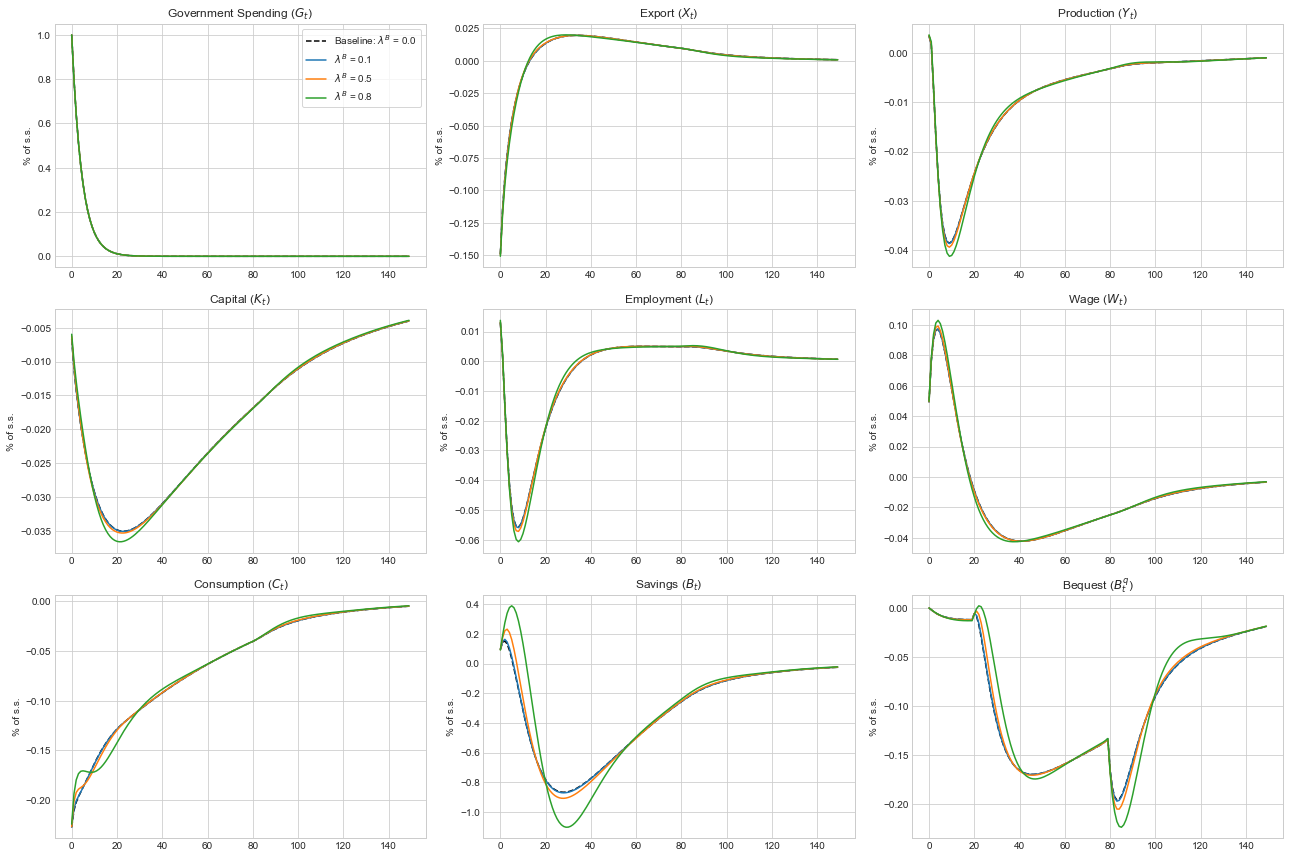

In [24]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'Baseline: $\lambda^B$ = {Models[0].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'$\lambda^B$ = {Models[1].par.lambda_B}')
ax.plot((Models[2].sol.G[:T_IRF]/Models[2].ss.G-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.plot((Models[3].sol.G[:T_IRF]/Models[3].ss.G-1)*100,label=f'$\lambda^B$ = {Models[3].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'Baseline: $\lambda^B$ = {Models[0].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'$\lambda^B$ = {Models[1].par.lambda_B}')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.plot((Models[3].sol.X[:T_IRF]/Models[3].ss.X-1)*100,label=f'$\lambda^B$ = {Models[3].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_title('Export ($X_t$)')

ax = fig.add_subplot(3,3,3)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$Baseline:\lambda^B$ = {Models[0].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$\lambda^B$ = {Models[1].par.lambda_B}')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.plot((Models[3].sol.Y[:T_IRF]/Models[3].ss.Y-1)*100,label=f'$\lambda^B$ = {Models[3].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_title('Production ($Y_t$)')

ax = fig.add_subplot(3,3,4)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'Baseline:$\lambda^B$ = {Models[0].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'$\lambda^B$ = {Models[1].par.lambda_B}')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.plot((Models[3].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\lambda^B$ = {Models[3].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_title('Capital ($K_t$)')

ax = fig.add_subplot(3,3,5)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'Baseline:$\lambda^B$ = {Models[0].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'$\lambda^B$ = {Models[1].par.lambda_B}')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.plot((Models[3].sol.L[:T_IRF]/Models[3].ss.L-1)*100,label=f'$\lambda^B$ = {Models[3].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_title('Employment ($L_{t}$)')

ax = fig.add_subplot(3,3,6)
ax.plot((Models[0].sol.W[:T_IRF]/Models[0].ss.W-1)*100,label=f'Baseline:$\lambda^B$ = {Models[0].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.W[:T_IRF]/Models[1].ss.W-1)*100,label=f'$\lambda^B$ = {Models[1].par.lambda_B}')
ax.plot((Models[2].sol.W[:T_IRF]/Models[2].ss.W-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.plot((Models[3].sol.W[:T_IRF]/Models[3].ss.W-1)*100,label=f'$\lambda^B$ = {Models[3].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_title('Wage ($W_{t}$)')

ax = fig.add_subplot(3,3,7)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'Baseline:$\lambda^B$ = {Models[0].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'$\lambda^B$ = {Models[1].par.lambda_B}')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.plot((Models[3].sol.C[:T_IRF]/Models[3].ss.C-1)*100,label=f'$\lambda^B$ = {Models[3].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_title('Consumption ($C_{t}$)')

ax = fig.add_subplot(3,3,8)
ax.plot((Models[0].sol.B[:T_IRF]/Models[0].ss.B-1)*100,label=f'Baseline:$\lambda^B$ = {Models[0].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.B[:T_IRF]/Models[1].ss.B-1)*100,label=f'$\lambda^B$ = {Models[1].par.lambda_B}')
ax.plot((Models[2].sol.B[:T_IRF]/Models[2].ss.B-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.plot((Models[3].sol.B[:T_IRF]/Models[3].ss.B-1)*100,label=f'$\lambda^B$ = {Models[3].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_title('Savings ($B_{t}$)')

ax = fig.add_subplot(3,3,9)
ax.plot((Models[0].sol.Bq[:T_IRF]/Models[0].ss.Bq-1)*100,label=f'Baseline:$\lambda^B$ = {Models[0].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.Bq[:T_IRF]/Models[1].ss.Bq-1)*100,label=f'$\lambda^B$ = {Models[1].par.lambda_B}')
ax.plot((Models[2].sol.Bq[:T_IRF]/Models[2].ss.Bq-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.plot((Models[3].sol.Bq[:T_IRF]/Models[3].ss.Bq-1)*100,label=f'$\lambda^B$ = {Models[3].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_title('Bequest ($B^{q}_{t}$)')
fig.tight_layout(pad=1.0); # spacing between subplots;

# Change in Export Rigidity

In [25]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()
model3 = model.copy()

In [26]:
Models = [model, model1, model2, model3] #Create list of the models
Lambdas_X = [0.0, 0.1, 0.5, 0.8] #Create list of Lambda values
    
for i in range(len(Models)):
    Models[i].par.lambda_X = Lambdas_X[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Gshock = 50
    shock_G = 0.01*Models[i].ss.G
    persistence_G = 0.80**np.arange(Gshock)
    Models[i].sol.G[:Gshock] = Models[i].ss.G + shock_G*persistence_G
    Models[i].find_IRF()

initial:
   max. abs. error = 7.58e-01
    0.00e+00 in bargaining_cond
    7.58e-01 in Bq_match
    4.44e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    5.56e-01 in mkt_clearing

it = 0
 solve: t1-t0 = 0.2 secs
   max. abs. error = 7.58e-01
    1.49e-06 in bargaining_cond
    7.41e-04 in Bq_match
    2.02e-06 in FOC_capital_agency
    5.27e-05 in FOC_K_ell
    1.57e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.2 secs
   max. abs. error = 1.57e-03
    2.41e-08 in bargaining_cond
    5.73e-06 in Bq_match
    2.08e-08 in FOC_capital_agency
    7.47e-07 in FOC_K_ell
    2.02e-05 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.2 secs
   max. abs. error = 2.02e-05
    2.77e-10 in bargaining_cond
    4.53e-08 in Bq_match
    2.75e-10 in FOC_capital_agency
    8.26e-09 in FOC_K_ell
    2.13e-07 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

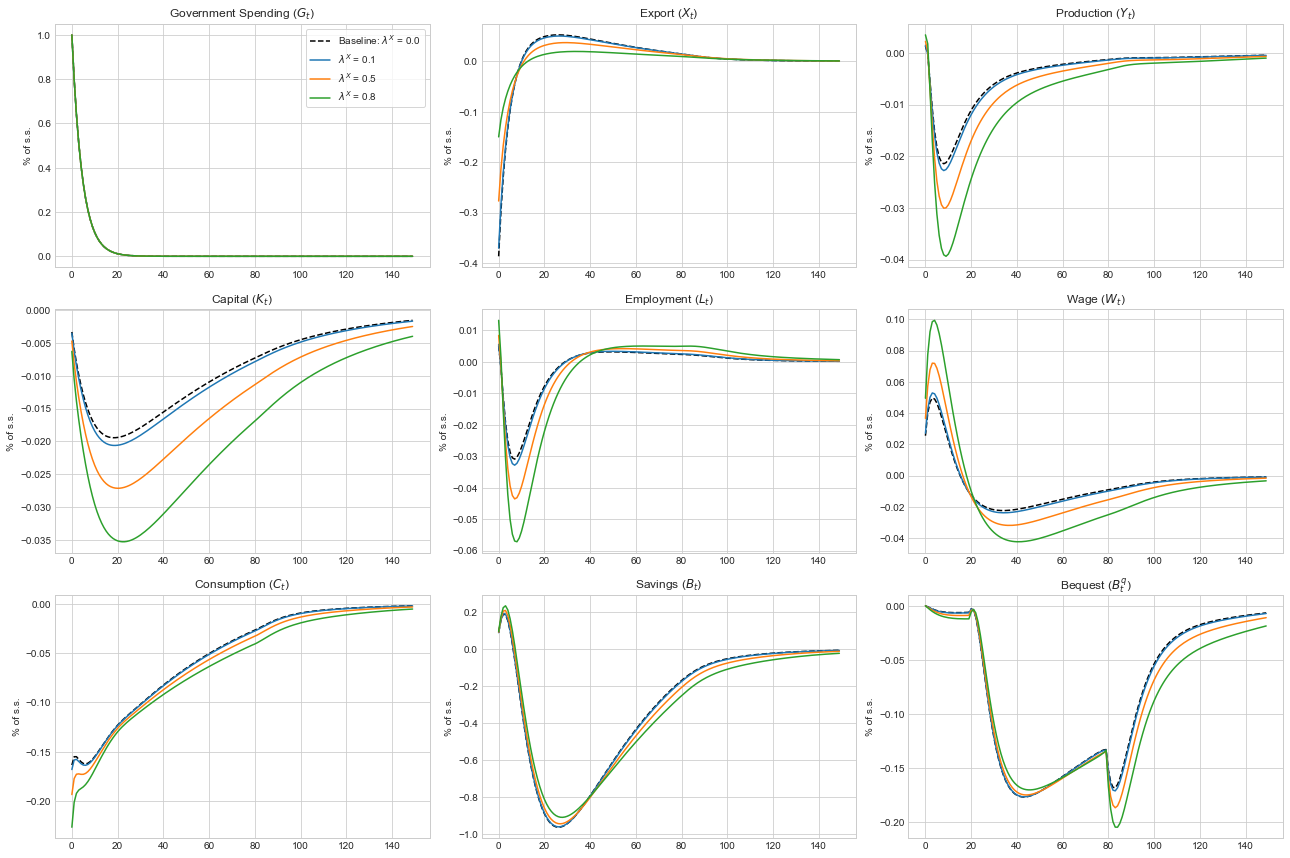

In [27]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'Baseline: $\lambda^X$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'$\lambda^X$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.G[:T_IRF]/Models[2].ss.G-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.G[:T_IRF]/Models[3].ss.G-1)*100,label=f'$\lambda^X$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'Baseline: $\lambda^X$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'$\lambda^X$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.X[:T_IRF]/Models[3].ss.X-1)*100,label=f'$\lambda^X$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Export ($X_t$)')

ax = fig.add_subplot(3,3,3)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$Baseline:\lambda^X$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$\lambda^X$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.Y[:T_IRF]/Models[3].ss.Y-1)*100,label=f'$\lambda^X$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Production ($Y_t$)')

ax = fig.add_subplot(3,3,4)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'Baseline:$\lambda^X$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'$\lambda^X$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\lambda^X$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Capital ($K_t$)')

ax = fig.add_subplot(3,3,5)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'Baseline:$\lambda^X$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'$\lambda^X$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.L[:T_IRF]/Models[3].ss.L-1)*100,label=f'$\lambda^X$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Employment ($L_{t}$)')

ax = fig.add_subplot(3,3,6)
ax.plot((Models[0].sol.W[:T_IRF]/Models[0].ss.W-1)*100,label=f'Baseline:$\lambda^X$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.W[:T_IRF]/Models[1].ss.W-1)*100,label=f'$\lambda^X$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.W[:T_IRF]/Models[2].ss.W-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.W[:T_IRF]/Models[3].ss.W-1)*100,label=f'$\lambda^X$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Wage ($W_{t}$)')

ax = fig.add_subplot(3,3,7)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'Baseline:$\lambda^X$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'$\lambda^X$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.C[:T_IRF]/Models[3].ss.C-1)*100,label=f'$\lambda^X$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Consumption ($C_{t}$)')

ax = fig.add_subplot(3,3,8)
ax.plot((Models[0].sol.B[:T_IRF]/Models[0].ss.B-1)*100,label=f'Baseline:$\lambda^X$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.B[:T_IRF]/Models[1].ss.B-1)*100,label=f'$\lambda^X$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.B[:T_IRF]/Models[2].ss.B-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.B[:T_IRF]/Models[3].ss.B-1)*100,label=f'$\lambda^X$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Savings ($B_{t}$)')

ax = fig.add_subplot(3,3,9)
ax.plot((Models[0].sol.Bq[:T_IRF]/Models[0].ss.Bq-1)*100,label=f'Baseline:$\lambda^X$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.Bq[:T_IRF]/Models[1].ss.Bq-1)*100,label=f'$\lambda^X$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.Bq[:T_IRF]/Models[2].ss.Bq-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.Bq[:T_IRF]/Models[3].ss.Bq-1)*100,label=f'$\lambda^X$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Bequest ($B^{q}_{t}$)')
fig.tight_layout(pad=1.0); # spacing between subplots;

In [28]:
# Change in Capital Adjustment Costs

In [29]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()
model3 = model.copy()

In [31]:
Models = [model, model1, model2, model3] #Create list of the models
psi_0 = [0.5, 1.0, 2.0, 4.0] #Create list of Lambda values
    
for i in range(len(Models)):
    Models[i].par.Psi_0 = psi_0[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Gshock = 50
    shock_G = 0.01*Models[i].ss.G
    persistence_G = 0.80**np.arange(Gshock)
    Models[i].sol.G[:Gshock] = Models[i].ss.G + shock_G*persistence_G
    Models[i].find_IRF()

initial:
   max. abs. error = 7.58e-01
    0.00e+00 in bargaining_cond
    7.58e-01 in Bq_match
    0.00e+00 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    5.56e-01 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 7.58e-01
    3.84e-06 in bargaining_cond
    1.82e-03 in Bq_match
    5.45e-06 in FOC_capital_agency
    1.23e-04 in FOC_K_ell
    1.97e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.97e-03
    1.00e-07 in bargaining_cond
    2.83e-05 in Bq_match
    9.04e-08 in FOC_capital_agency
    3.30e-06 in FOC_K_ell
    4.32e-05 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 4.32e-05
    1.86e-09 in bargaining_cond
    2.73e-07 in Bq_match
    1.81e-09 in FOC_capital_agency
    5.90e-08 in FOC_K_ell
    8.01e-07 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

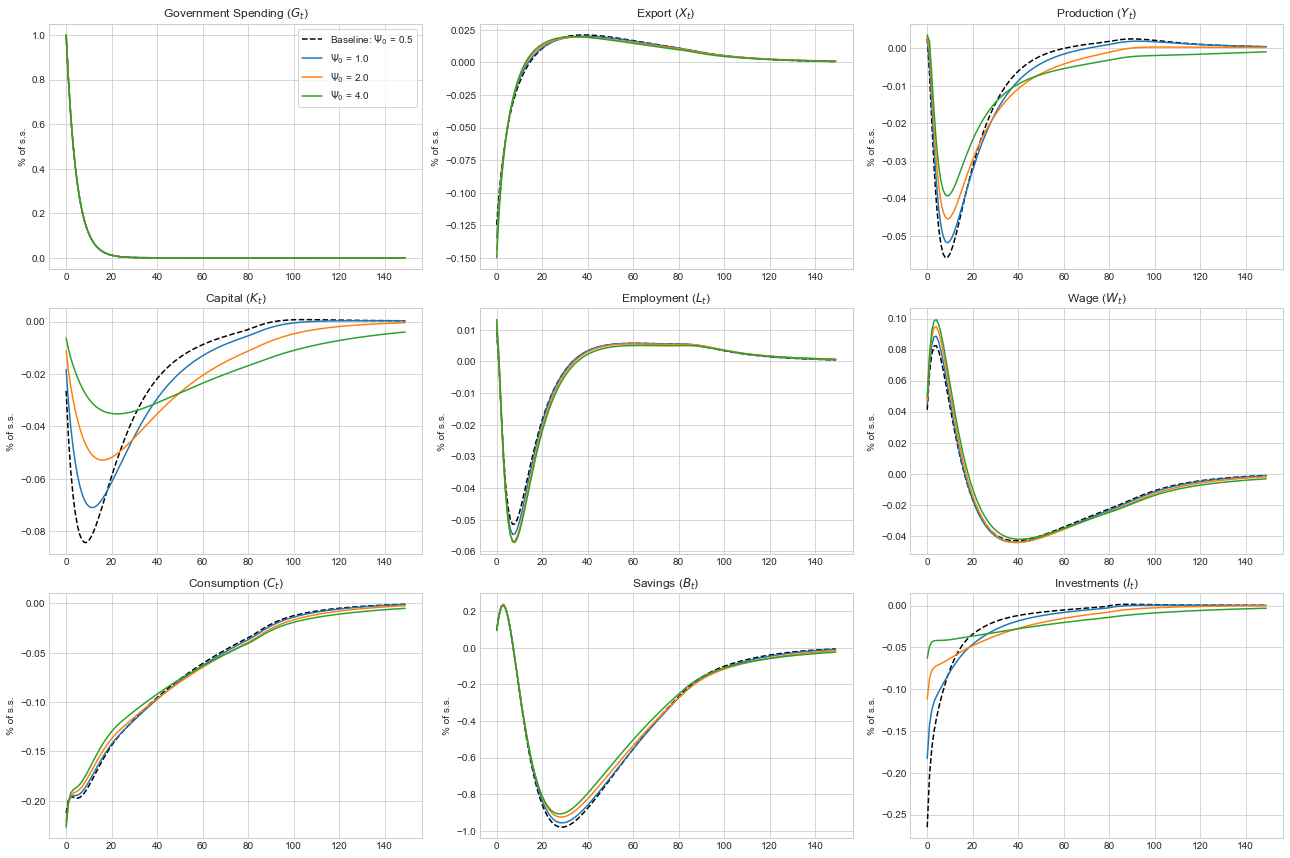

In [34]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'Baseline: $\Psi_0$ = {Models[0].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'$\Psi_0$ = {Models[1].par.Psi_0}')
ax.plot((Models[2].sol.G[:T_IRF]/Models[2].ss.G-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.plot((Models[3].sol.G[:T_IRF]/Models[3].ss.G-1)*100,label=f'$\Psi_0$ = {Models[3].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'Baseline: $\Psi_0$ = {Models[0].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'$\Psi_0$ = {Models[1].par.Psi_0}')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.plot((Models[3].sol.X[:T_IRF]/Models[3].ss.X-1)*100,label=f'$\Psi_0$ = {Models[3].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_title('Export ($X_t$)')

ax = fig.add_subplot(3,3,3)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$Baseline:\Psi_0$ = {Models[0].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$\Psi_0$ = {Models[1].par.Psi_0}')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.plot((Models[3].sol.Y[:T_IRF]/Models[3].ss.Y-1)*100,label=f'$\Psi_0$ = {Models[3].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_title('Production ($Y_t$)')

ax = fig.add_subplot(3,3,4)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'Baseline:$\Psi_0$ = {Models[0].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'$\Psi_0$ = {Models[1].par.Psi_0}')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.plot((Models[3].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\Psi_0$ = {Models[3].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_title('Capital ($K_t$)')

ax = fig.add_subplot(3,3,5)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'Baseline:$\Psi_0$ = {Models[0].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'$\Psi_0$ = {Models[1].par.Psi_0}')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.plot((Models[3].sol.L[:T_IRF]/Models[3].ss.L-1)*100,label=f'$\Psi_0$ = {Models[3].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_title('Employment ($L_{t}$)')

ax = fig.add_subplot(3,3,6)
ax.plot((Models[0].sol.W[:T_IRF]/Models[0].ss.W-1)*100,label=f'Baseline:$\Psi_0$ = {Models[0].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.W[:T_IRF]/Models[1].ss.W-1)*100,label=f'$\Psi_0$ = {Models[1].par.Psi_0}')
ax.plot((Models[2].sol.W[:T_IRF]/Models[2].ss.W-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.plot((Models[3].sol.W[:T_IRF]/Models[3].ss.W-1)*100,label=f'$\Psi_0$ = {Models[3].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_title('Wage ($W_{t}$)')

ax = fig.add_subplot(3,3,7)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'Baseline:$\Psi_0$ = {Models[0].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'$\Psi_0$ = {Models[1].par.Psi_0}')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.plot((Models[3].sol.C[:T_IRF]/Models[3].ss.C-1)*100,label=f'$\Psi_0$ = {Models[3].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_title('Consumption ($C_{t}$)')

ax = fig.add_subplot(3,3,8)
ax.plot((Models[0].sol.B[:T_IRF]/Models[0].ss.B-1)*100,label=f'Baseline:$\Psi_0$ = {Models[0].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.B[:T_IRF]/Models[1].ss.B-1)*100,label=f'$\Psi_0$ = {Models[1].par.Psi_0}')
ax.plot((Models[2].sol.B[:T_IRF]/Models[2].ss.B-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.plot((Models[3].sol.B[:T_IRF]/Models[3].ss.B-1)*100,label=f'$\Psi_0$ = {Models[3].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_title('Savings ($B_{t}$)')

ax = fig.add_subplot(3,3,9)
ax.plot((Models[0].sol.I[:T_IRF]/Models[0].ss.I-1)*100,label=f'Baseline:$\Psi_0$ = {Models[0].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.I[:T_IRF]/Models[1].ss.I-1)*100,label=f'$\Psi_0$ = {Models[1].par.Psi_0}')
ax.plot((Models[2].sol.I[:T_IRF]/Models[2].ss.I-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.plot((Models[3].sol.I[:T_IRF]/Models[3].ss.I-1)*100,label=f'$\Psi_0$ = {Models[3].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_title('Investments ($I_{t}$)')
fig.tight_layout(pad=1.0); # spacing between subplots;